# Clustering hands-on
Goal of this excercise is to complete the hands-on experience task with similar task description as in the clustering project case.

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Data description

Data source: https://www.kaggle.com/datasets/subhajitnayak/country-data?resource=download&select=Country-data.csv

|Attribute|Description|
|:-------|:-------|
|country | Name of the country |
|child_mort | Death of children under 5 years of age per 1000 live births |
|exports | Exports of goods and services. Given as %age of the Total GDP |
|health | Total health spending as %age of Total GDP |
|imports | Imports of goods and services. Given as %age of the Total GDP |
|Income | Net income per person |
|Inflation | The measurement of the annual growth rate of the Total GDP |
|life_expec | The average number of years a new born child would live if the current mortality patterns are to rem... |
|total_fer | The number of children that would be born to each woman if the current age-fertility rates remain th... |
|gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population. |

# Data loading

In [3]:
df = pd.read_csv('country-data.csv')
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [4]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5]:
df_only_numeric = df.select_dtypes(np.number)

# Create the subplots
n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

## Is it wise to scale the data?
- How would it help us?
- What different options do we have?

## Use k-means or agglomerative clustering algorithm to cluster the data
- How many clusters did you choose? Why?

## Perform an exploration analysis of the clustered data
- Write down your conlusions about differences/similarities about the feature characteristics according to the individial clusters

## Write down a conlustion about clusters as a whole, i.e. try to characterize the data in them in a few sentences
- Cluster 1 - ...
- Cluster 2 - ...
- ...
- Cluster N - ...

# Task (2p)
- Finished the proposed tasks

**Write down conclusion to the Markdown cell**

# Data preprocessing
- Why do we need to preprocess the data?

In [7]:
X = df_only_numeric.values
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [9]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(X)
X_min_max_scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [10]:
df.select_dtypes(np.number).columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
df_scaled = pd.DataFrame(X_min_max_scaled, columns=df_only_numeric.columns)

In [ ]:
df_scaled

In [12]:
X2 = df_scaled.values
X2

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

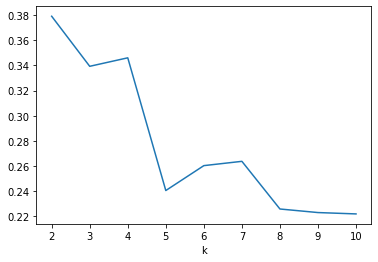

In [16]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X2)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X2, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores.sse.plot()
plt.figure()
df_clustering_scores.silhouette.plot()

Ideal number of clusters are 4,

7 was not well divided (small clusters (9, 7, 3)

In [29]:
clustering = sklearn.cluster.KMeans(n_clusters=4)
clustering.fit(X2)

KMeans(n_clusters=4)

In [30]:
pd.Series(clustering.labels_).value_counts()

2    87
1    45
0    27
3     8
dtype: int64

In [32]:
df_scaled['cluster_id'] = clustering.labels_
df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  cluster_id  
0   0.736593  0.003073           1  
1   0.078864  0.036833           2  
2   0.274448  0.040365           2  
3   0.790221  0.031488           1  
4   0.154574  0.114242           2

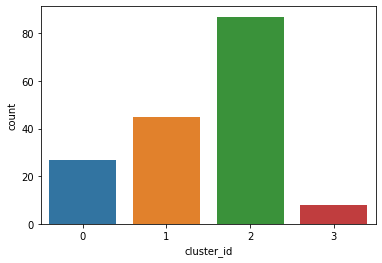

In [33]:
sns.countplot(data=df_scaled, x='cluster_id')

In [34]:
with pd.option_context('display.max_columns', None):
    display(df_scaled.groupby('cluster_id').describe())

child_mort                                                    \
                count      mean       std       min       25%       50%   
cluster_id                                                                
0                27.0  0.009467  0.010291  0.000000  0.004382  0.007303   
1                45.0  0.448556  0.160668  0.166991  0.312561  0.426972   
2                87.0  0.096459  0.070373  0.009250  0.042600  0.077897   
3                 8.0  0.021117  0.016082  0.000974  0.006086  0.024830   

                               exports                                \
                 75%       max   count      mean       std       min   
cluster_id                                                             
0           0.009494  0.054528    27.0  0.203029  0.088065  0.061489   
1           0.527751  1.000000    45.0  0.143746  0.092239  0.010461   
2           0.129260  0.300876    87.0  0.204365  0.096931  0.000000   
3           0.032984  0.039922     8.0  0.565451  0.275004  0.311125   

                                                   health                      \
                 25%       50%       75%       max  count      mean       std   
cluster_id                                                                      
0           0.137030  0.193060  0.254093  0.381663   27.0  0.510623  0.136570   
1           0.083501  0.118520  0.184556  0.428689   45.0  0.278392  0.166389   
2           0.134028  0.188057  0.257095  0.468710   87.0  0.276119  0.135185   
3           0.335763  0.451451  0.792387  1.000000    8.0  0.202222  0.184749   

                                                             imports  \
                 min       25%       50%       75%       max   count   
cluster_id                                                             
0           0.258546  0.457738  0.486016  0.580485  1.000000    27.0   
1           0.024239  0.167806  0.216905  0.362958  0.701678    45.0   
2           0.009944  0.191112  0.259167  0.355190  0.770044    87.0   
3           0.000000  0.060752  0.124301  0.384089  0.458670     8.0   

                                                                        \
                mean       std       min       25%       50%       75%   
cluster_id                                                               
0           0.226697  0.088432  0.077812  0.162326  0.214645  0.269838   
1           0.243711  0.103141  0.098509  0.172100  0.231318  0.283062   
2           0.273966  0.115778  0.000000  0.183024  0.282487  0.347741   
3           0.504338  0.352438  0.136455  0.170950  0.431106  0.833270   

                     income                                                    \
                 max  count      mean       std       min       25%       50%   
cluster_id                                                                      
0           0.429094   27.0  0.300176  0.071212  0.179201  0.247132  0.291749   
1           0.580301   45.0  0.023687  0.043780  0.000000  0.006279  0.009977   
2           0.620546   87.0  0.096968  0.069494  0.009414  0.049007  0.079515   
3           1.000000    8.0  0.574125  0.237122  0.222613  0.434244  0.587189   

                               inflation                                \
                 75%       max     count      mean       std       min   
cluster_id                                                               
0           0.333955  0.495944      27.0  0.051324  0.016926  0.021347   
1           0.021794  0.266024      45.0  0.151784  0.146265  0.047084   
2           0.130162  0.360082      87.0  0.109231  0.071194  0.000000   
3           0.665370  1.000000       8.0  0.098471  0.062001  0.009149   

                                                   life_expec            \
                 25%       50%       75%       max      count      mean   
cluster_id                                                                
0           0.042002  0.048064  0.056880  0.093892       27.0  0.952736   
1

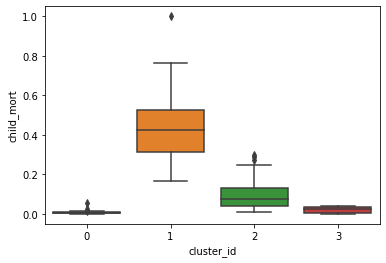

In [36]:
sns.boxplot(data=df_scaled, y='child_mort', x='cluster_id')

In [55]:
sns.boxplot(data=df_scaled, y='imports', x='cluster_id')

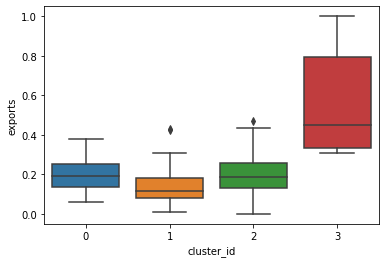

In [49]:
sns.boxplot(data=df_scaled, y='exports', x='cluster_id')

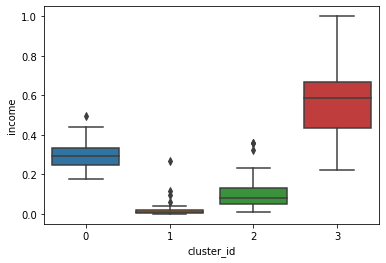

In [51]:
sns.boxplot(data=df_scaled, y='income', x='cluster_id')


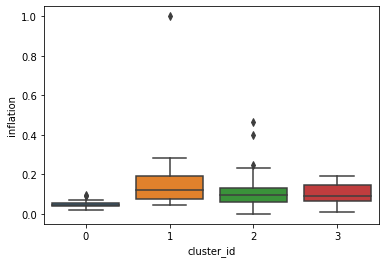

In [54]:
sns.boxplot(data=df_scaled, y='inflation', x='cluster_id')

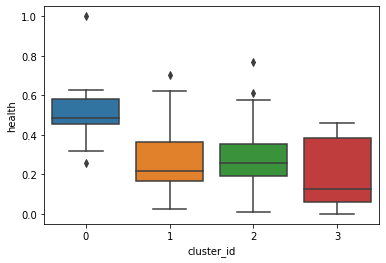

In [63]:
sns.boxplot(data=df_scaled, y='health', x='cluster_id')


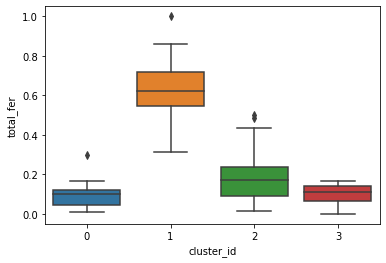

In [57]:
sns.boxplot(data=df_scaled, y='total_fer', x='cluster_id')


In [59]:
sns.boxplot(data=df_scaled, y='gdpp', x='cluster_id')


Cluster 1 - velke GDP, min deti, stabilni mala inflace, stredni income, skoro nulova child mortality

Cluster 2 - male a nejmensi GDP, velky pocet deti, vetsi inflace, hodne maly income, velka child_mortality

Cluster 3 - male a druhe nejmensi GDP, min deti ale vic nez v Clusteru 1, stredni inflace, vetsi import, stredni income, stredni az mala child mortality, 

Cluster 4 - velke GDP, malo deti, velky a nejvetsi income, velky a nejvetsi import a export, stredni inflace, skoro nulova child mortality